In [1]:
# General libraries
import pandas as pd
import numpy as np
import joblib
import warnings
warnings.filterwarnings('ignore')

# Scikit Learn libraries
from sklearn.model_selection import train_test_split

# Utils functions
from utils.utils import compare_models, plot_score_dist, compare_confidence_intervals, five_two, read_datasets

In [2]:
x_train, x_test, y_train, y_test = read_datasets(
    'x_train_2.csv',
    'x_test_2.csv',
    'y_train_2.csv',
    'y_test_2.csv'
)

In [3]:
def load_model(model):
    models_folder = '../models/'
    return joblib.load(models_folder + model + '_model_high_removed.joblib')

In [4]:
#1000 to 10.000 did not show significative differences
#size 2270 based on the paper: https://www.econstor.eu/bitstream/10419/67820/1/587473266.pdf
random_state_list = list(np.random.randint(low = 1,high=5000,size=2270))

## Linear Regression VS SVR

In [5]:
five_two(
    reg1=load_model('lr'),
    reg2=load_model('svr'),
    X=x_train.copy(),
    y=y_train.copy(),
    metric='default'
    )

Fold  1 score difference = -0.034851
Fold  2 score difference = -0.098243
Fold  1 score difference = -0.065096
Fold  2 score difference = -0.091433
Fold  1 score difference = -0.131938
Fold  2 score difference = -0.052872
Fold  1 score difference = -0.025936
Fold  2 score difference = -0.125785
Fold  1 score difference = -0.174860
Fold  2 score difference = -0.107642
Regression 1 mean score and stdev : 0.079571 + 0.060843
Regression 2 mean score and stdev : 0.170436 + 0.041477
Score difference mean + stdev : -0.090865 + 0.044451
t_value for the current test is -0.690806


mean_score_1 -0.049566102613079595, std 0.12344115344750228
mean_score_2 0.1788202615477363, std 0.07924974793744258
Ttest_relResult(statistic=-124.8258273311796, pvalue=0.0)
P value menor ou igual a 0.05


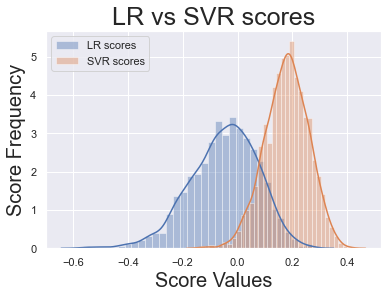

In [6]:
reg1_scores, reg2_scores = compare_models(
    reg1=load_model('lr'),
    reg2=load_model('svr'),
    X=x_test.copy(),
    y=y_test.copy(),
    random_state_list = random_state_list
)


plot_score_dist(reg1_scores, reg2_scores, 'LR', 'SVR')

In [7]:
compare_confidence_intervals(
    reg1_scores, reg2_scores,
    lower=2.5, upper=97.5
)

-0.31352696948475445
0.16213181081161376
0.01850250983833928
0.32661974952470607


## Linear Regression VS XGBoost

In [8]:
five_two(
    reg1=load_model('lr'),
    reg2=load_model('xgboost'),
    X=x_train.copy(),
    y=y_train.copy(),
    metric='default'
    )

[05:58:42] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/gbm/gbtree.cc:82: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
Fold  1 score difference = -0.015757
[05:58:42] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/gbm/gbtree.cc:82: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
Fold  2 score difference = 0.007971
[05:58:42] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/gbm/gbtree.cc:82: DANGER AHEAD: You have

mean_score_1 -0.049566102613079595, std 0.12344115344750228
mean_score_2 0.2558433890263457, std 0.07042035914665207
Ttest_relResult(statistic=-165.84453390884772, pvalue=0.0)
P value menor ou igual a 0.05


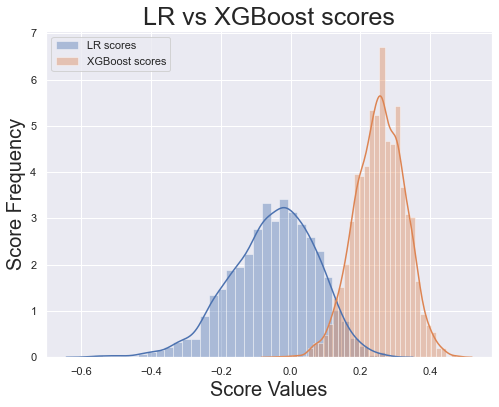

In [9]:
reg1_scores, reg2_scores = compare_models(
    reg1=load_model('lr'),
    reg2=load_model('xgboost'),
    X=x_test.copy(),
    y=y_test.copy(),
    random_state_list = random_state_list
)

plot_score_dist(reg1_scores, reg2_scores, 'LR', 'XGBoost')

In [10]:
compare_confidence_intervals(
    reg1_scores, reg2_scores,
    lower=2.5, upper=97.5
)

-0.31352696948475445
0.16213181081161376
0.1161933757787444
0.3875813909959959


## SVR VS XGboost

In [11]:
five_two(
    reg1=load_model('svr'),
    reg2=load_model('xgboost'),
    X=x_train.copy(),
    y=y_train.copy(),
    metric='default'
    )

[05:59:12] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/gbm/gbtree.cc:82: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
Fold  1 score difference = 0.019093
[05:59:12] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/gbm/gbtree.cc:82: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
Fold  2 score difference = 0.106214
[05:59:12] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/gbm/gbtree.cc:82: DANGER AHEAD: You have 

mean_score_1 0.1788202615477363, std 0.07924974793744258
mean_score_2 0.2558433890263457, std 0.07042035914665207
Ttest_relResult(statistic=-74.4321644425779, pvalue=0.0)
P value menor ou igual a 0.05


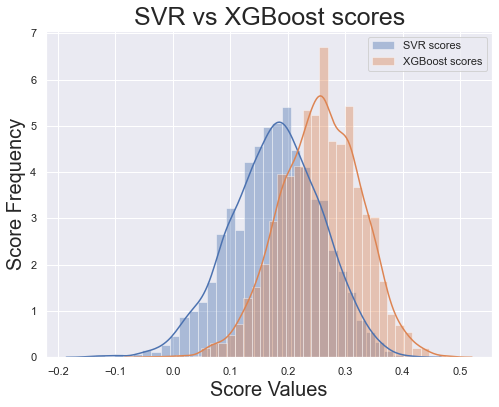

In [12]:
reg1_scores, reg2_scores = compare_models(
    reg1=load_model('svr'),
    reg2=load_model('xgboost'),
    X=x_test.copy(),
    y=y_test.copy(),
    random_state_list = random_state_list
)

plot_score_dist(reg1_scores, reg2_scores, 'SVR', 'XGBoost')

In [13]:
compare_confidence_intervals(
    reg1_scores, reg2_scores,
    lower=2.5, upper=97.5
)

0.01850250983833928
0.32661974952470607
0.1161933757787444
0.3875813909959959


mean_score_1 -0.27202351642605554, std 0.12275941347172478
mean_score_2 -0.15271318170428808, std 0.10908251710951988
Ttest_relResult(statistic=-74.4321644425779, pvalue=0.0)
P value menor ou igual a 0.05


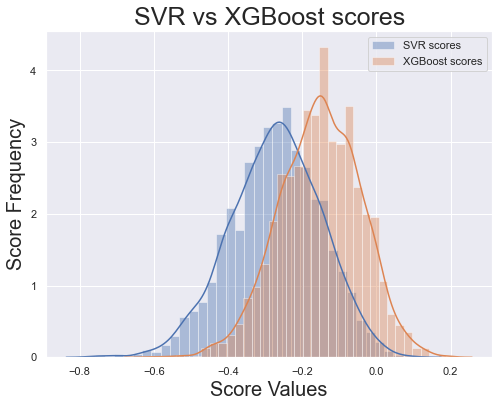

In [14]:
reg1_scores, reg2_scores = compare_models(
    reg1=load_model('svr'),
    reg2=load_model('xgboost'),
    X=x_test.copy(),
    y=y_test.copy(),
    metric="adj_r2",
    random_state_list = random_state_list
)

plot_score_dist(reg1_scores, reg2_scores, 'SVR', 'XGBoost')

In [15]:
compare_confidence_intervals(
    reg1_scores, reg2_scores,
    lower=2.5, upper=97.5
)

-0.5203588573092393
-0.04307921152055341
-0.36903379046037627
0.05135156644477805


# XGBoost vs Neural Network

In [16]:
five_two(
    reg1=load_model('xgboost'),
    reg2=load_model('mlpRegressor'),
    X=x_train.copy(),
    y=y_train.copy(),
    metric='default'
    )

[06:00:42] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/gbm/gbtree.cc:82: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
Fold  1 score difference = -0.014634
[06:00:42] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/gbm/gbtree.cc:82: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
Fold  2 score difference = -0.072036
[06:00:42] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/gbm/gbtree.cc:82: DANGER AHEAD: You hav

mean_score_1 0.2558433890263457, std 0.07042035914665207
mean_score_2 0.14745747349672067, std 0.08452907066892534
Ttest_relResult(statistic=97.23782662354833, pvalue=0.0)
P value menor ou igual a 0.05


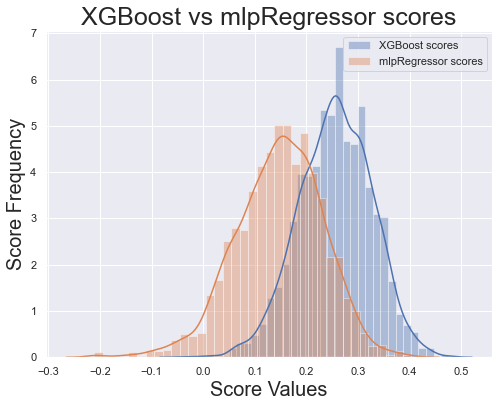

In [17]:
reg1_scores, reg2_scores = compare_models(
    reg1=load_model('xgboost'),
    reg2=load_model('mlpRegressor'),
    X=x_test.copy(),
    y=y_test.copy(),
    random_state_list = random_state_list
)

plot_score_dist(reg1_scores, reg2_scores, 'XGBoost', 'mlpRegressor')

In [18]:
compare_confidence_intervals(
    reg1_scores, reg2_scores,
    lower=2.5, upper=97.5
)

0.1161933757787444
0.3875813909959959
-0.03396073719109993
0.2982149621616687
